In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor
import matplotlib as mpl
import numpy as np
# import basic plot tools
from qiskit.visualization import plot_histogram

**comment : if the input unknown function has all zero's or all one's i.e. it is constant function then the output will be all 0
    and if the unkownw function has combination of zero's and ones' then it will we balanced and the output will be all 1**

In [2]:
# length of the n-bit string
n = 4

# for constant oracle 

In [3]:
constant_oracle = QuantumCircuit(n+1)
constant_oracle.clear()

output = np.random.randint(2) # random no. 0/1 as output

if output == 1:
    constant_oracle.x(n)


# for balance oracle

In [5]:

balance_oracle = QuantumCircuit(n+1)
balance_oracle.clear()

b_str = "1000"

# implementing x-gates

for i in range(len(b_str)):
    if b_str[i] == '1':
        balance_oracle.x(i)


balance_oracle.barrier()

# implementing cnot gates

for qubit in range(n):
    balance_oracle.cx(qubit, n)

balance_oracle.barrier()
balance_oracle.draw()
        
# implemneting x-gates

for i in range (len(b_str)):
    if b_str[i] == '1':
        balance_oracle.x(i)

balance_oracle.barrier()
        
        


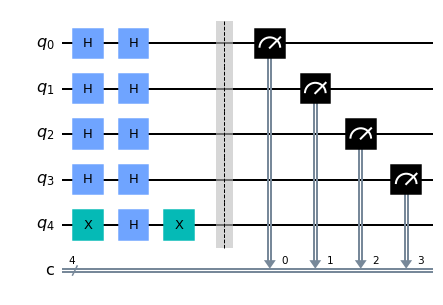

In [7]:
dj_circuit = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj_circuit.h(qubit)

# Put qubit in state |->
dj_circuit.x(n)
dj_circuit.h(n)

# Add oracle
dj_circuit = dj_circuit.compose(constant_oracle)

# Repeat H-gates
for qubit in range(n):
    dj_circuit.h(qubit)
dj_circuit.barrier()

# Measure
for i in range(n):
    dj_circuit.measure(i, i)

dj_circuit.draw('mpl')

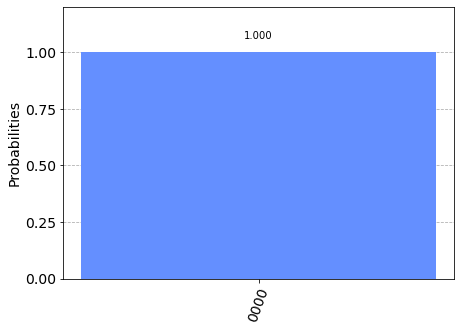

In [8]:
aer_sim = Aer.get_backend('aer_simulator')   #Local Simulator
shots = 1024                                 #No. of times the circuit is running
qobj = assemble(dj_circuit, shots = shots) 
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts) 

# Running on Quantum Computer